# Stroke model prediction

<br>

A stroke is a serious medical condition that can be life-threatening, according to the American Stroke Association. Stroke is a leading cause of death in the United States and is a major cause of serious disability for adults. About _795,000_ people in the United States have a stroke each year. 

<br>
<img src="img/gr1.jpg" width="680">

<br>
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. 
Each row in the data provides relavant information about the patient.

<br><br>
<img src="img/leading causes death USA 2019.png" width="680">

<img  style="float: left;" src="img/about_stroke.jpg" width="290" border=200>

<br>



### What is a stroke?
A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death. Learn more about what causes stroke and what happens during a stroke.

<br>
<br>
<br>
<br>
<br>


### Stroke Risk Factors
Eating foods low in saturated fats, trans fat, and cholesterol and high in fiber can help prevent high cholesterol. Limiting salt (sodium) in your diet can also lower your blood pressure. Smoking greatly increases your chances of having a stroke. Men should have no more than two drinks per day, and women only one.


### Conditions that increase Risk for Stroke
If you have already had a stroke or a transient ischemic attack (TIA), your chances of having another stroke are higher. High blood pressure is the leading cause of stroke and is the main cause for increased risk of stroke among people with diabetes. Diabetes causes sugars to build up in the blood and prevent oxygen and nutrients from getting to the various parts of your body, including your brain. A blood test can tell your doctor if you have high levels of cholesterol and triglycerides (a related kind of fat) in your blood.


### References
- https://www.cdc.gov/stroke/
- https://www.ninds.nih.gov/Disorders/Patient-Caregiver-Education/Hope-Through-Research/Stroke-Hope-Through-Research
- https://en.wikipedia.org/wiki/Stroke

## Dataset

**Dataset source**: Kaggle  https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


### Record fields

1. **id**: unique identifier

2. **gender**: "Male", "Female" or "Other"

3. **age**: age of the patient

4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. **Residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: average glucose level in blood

10. **bmi**: body mass index

11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. **stroke**: 1 if the patient had a stroke or 0 if not during his/her life

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


### Features
#### Body Mass Index

BMI is the most used index for obtaining an overall assessment of one's body weight. 
THE Body Mass Index (BMI) or body mass index (BMI) is a widely used parameter to get a general assessment of their body weight. It relates the height with the weight of the subject with a simple mathematical formula. It is obtained by dividing the weight in kg of the subject with the square of the height expressed in meters. 
<br> 

<img src="img/BMI.png" width="280">



## Load the enviroment

In [5]:
import numpy as np 
import pandas as pd 
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: Matplotlib requires dateutil>=2.7; you have 2.2

In [7]:
work_dir = sys.path[0]
work_dir

'/home/moebius/Desktop/stroke_model_prediction'

## Load Dataset

In [6]:
data = pd.read_csv(work_dir+"/data/healthcare-dataset-stroke-data.csv")

NameError: name 'work_dir' is not defined

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data exploration & preparation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
print("="*90)
print(" Categorical and Ordinal variables ")
print("="*90)
print("gender \t\t",data.gender.unique())
print("hypertension \t",data.hypertension.unique())
print("heart_disease \t",data.heart_disease.unique())
print("ever_married \t",data.ever_married.unique())
print("work_type \t\t",data.work_type.unique())
print("Residence_type \t",data.Residence_type.unique())
print("smoking_status \t",data.smoking_status.unique())
print("stroke \t\t",data.stroke.unique(), " yes | no ")

 Categorical and Ordinal variables 
gender 		 ['Male' 'Female' 'Other']
hypertension 	 [0 1]
heart_disease 	 [1 0]
ever_married 	 ['Yes' 'No']
work_type 		 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type 	 ['Urban' 'Rural']
smoking_status 	 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke 		 [1 0]  yes | no 


In [7]:
print("="*90)
print(" Numerical variables ")
print("="*90)
data.describe().T

 Numerical variables 


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Search for umbalanced classes

In [8]:
data.smoking_status.value_counts() # We can take it as balanced

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [9]:
data.work_type.value_counts() # We can take it as balanced

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

work_type is not umbalanced

In [10]:
data.Residence_type.value_counts()  # Balanced

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Residence_type is not umbalanced

In [11]:
data.ever_married.value_counts() # Un-balanced

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
data.hypertension.value_counts() # Un-balanced

0    4612
1     498
Name: hypertension, dtype: int64

In [13]:
data.gender.value_counts() # Balanced (except for 'Other')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
data=data[(data.gender != 'Other')] # remove 1 record with 'Other' in gender
data.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [61]:
data.stroke.value_counts() # Un-balanced

0    4860
1     249
Name: stroke, dtype: int64

In [63]:
data.heart_disease.value_counts() # Un-balanced

0    4833
1     276
Name: heart_disease, dtype: int64

## Rebalance umbalanced classes

- Theory https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

- Practice https://machinelearningmastery.com/multi-class-imbalanced-classification/

- Examples https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-e-coli-dataset/

- Un-balanced learn Github material
https://github.com/scikit-learn-contrib/imbalanced-learn

- SMOTE
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

Install requirements

In [ ]:
! pip3 install imblearn

Load libraries for over sampling

In [20]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.8.0


Build over sampler istance

In [26]:
ROS = RandomOverSampler(random_state=42)

Over sampling 'stroke' class

In [ ]:
X_sample = data.loc[:,:"smoking_status"]
Y_sample = data.stroke

In [46]:
X_res, y_res = ROS.fit_resample(X_sample, Y_sample)

In [50]:
y_res.value_counts() # Balanced

1    4860
0    4860
Name: stroke, dtype: int64

# Exploratory Data Analysis

In [52]:
X_res.heart_disease.value_counts()

0    8534
1    1186
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='Count'>

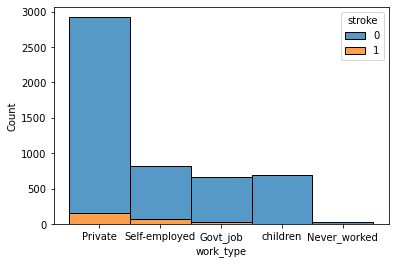

In [95]:
sns.histplot(data=data,x='work_type',hue='stroke', multiple="stack")

In [ ]:
sns.swarmplot(x='age', y='stroke', data=data, hue='gender',size=1.2,linewidth=0.1,palette='pastel')

In [106]:
data2=data[(data.smoking_status != 'Unknown')]

data3=pd.DataFrame(data2.smoking_status)

print("smoking_status: ",data3.smoking_status.unique())

smoking_status:  ['formerly smoked' 'never smoked' 'smokes']


In [ ]:
sns.swarmplot(x='age', y='stroke', data=data, hue='gender',size=1.2,linewidth=0.1,palette='pastel')

sroke class is umbalanced

In [9]:
sns.set_style("whitegrid")
sns.set_theme("notebook")
sns.set(rc={'figure.figsize':(12,9)} )
sns.set_palette(sns.color_palette("BrBG"))

(array([0, 1, 2]),
 [Text(0, 0, 'never smoked'),
  Text(1, 0, 'formerly smoked'),
  Text(2, 0, 'smokes')])

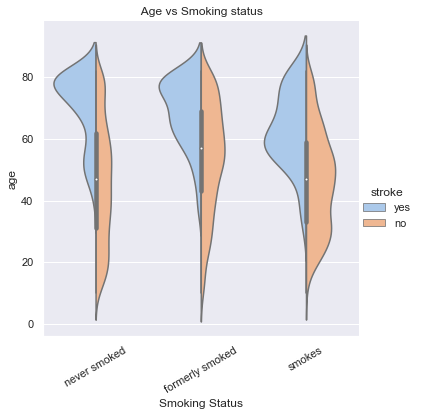

In [10]:

sns.catplot( x='smoking_status',
            y='age' ,
            data=data2,
            hue='stroke',
            kind="violin", split=True,
            palette="pastel",
            order=['never smoked','formerly smoked','smokes'])

sns.set(rc={'figure.figsize':(14,16)})
plt.title(" Age vs Smoking status")
plt.ylabel('age')
plt.xlabel('Smoking Status')
plt.xticks(rotation=30)

Text(0, 0.5, '')

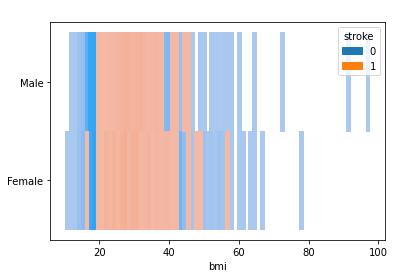

In [42]:
sns.histplot(data=data,x='bmi',y='gender',hue='stroke')
plt.title(" ")
plt.ylabel('')

<AxesSubplot:xlabel='age', ylabel='Residence_type'>

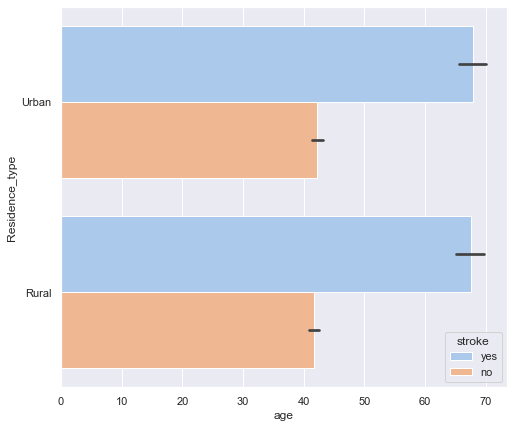

In [75]:
sns.set(rc={'figure.figsize':(8,7)})
sns.barplot(x="age", y="Residence_type", hue="stroke",
            palette="pastel", data=data)

<AxesSubplot:xlabel='age', ylabel='work_type'>

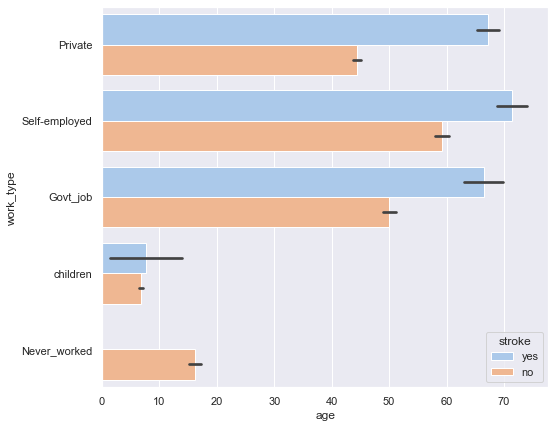

In [76]:
sns.set(rc={'figure.figsize':(8,7)})
sns.barplot(x="age", y="work_type", hue="stroke",
            palette="pastel", data=data)

Text(0.5, 0, 'work type')

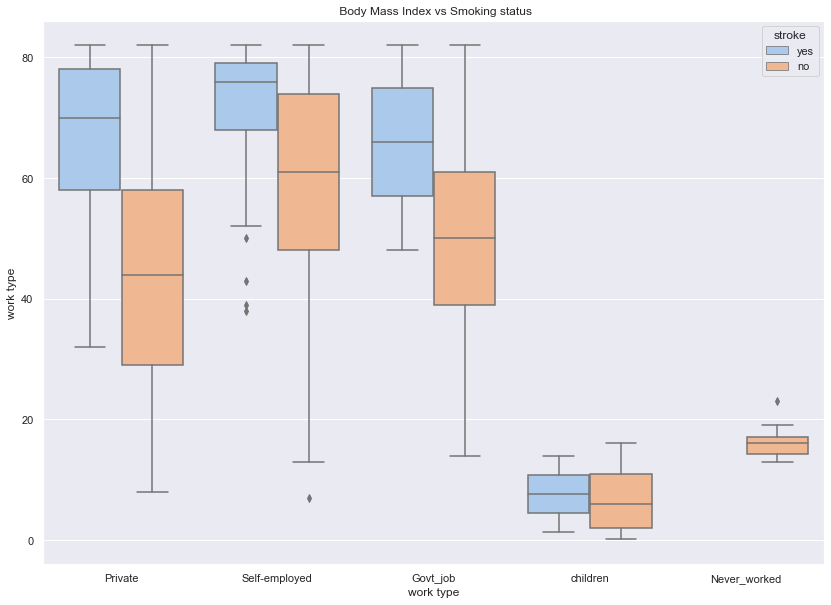

In [104]:
sns.boxplot(y='age',
               x='work_type' ,
               data=data,
               hue='stroke',
               palette="pastel")

sns.set(rc={'figure.figsize':(14,10)})

plt.title(" Body Mass Index vs Smoking status")
plt.ylabel('work type')
plt.xlabel('work type')

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

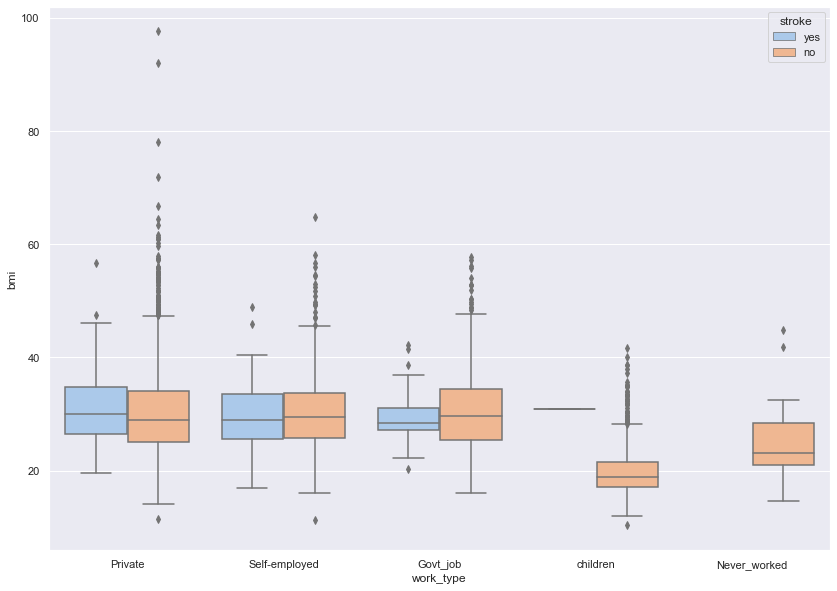

In [105]:
sns.boxplot(y='bmi',
               x='work_type' ,
               data=data,
               hue='stroke',
               palette="pastel")


<AxesSubplot:xlabel='ever_married', ylabel='age'>

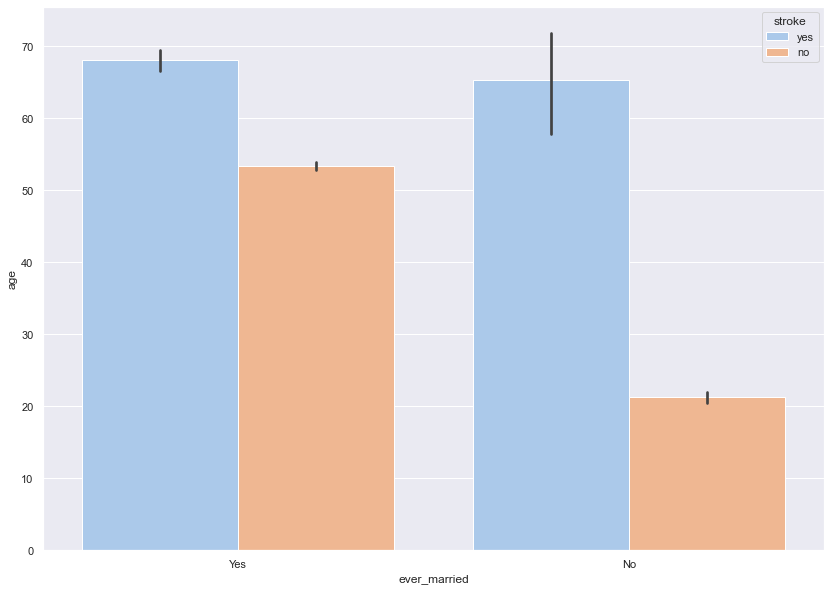

In [108]:
sns.barplot(y='age',
               x='ever_married' ,
               data=data,
               hue='stroke',
               palette="pastel")


<AxesSubplot:xlabel='ever_married', ylabel='age'>

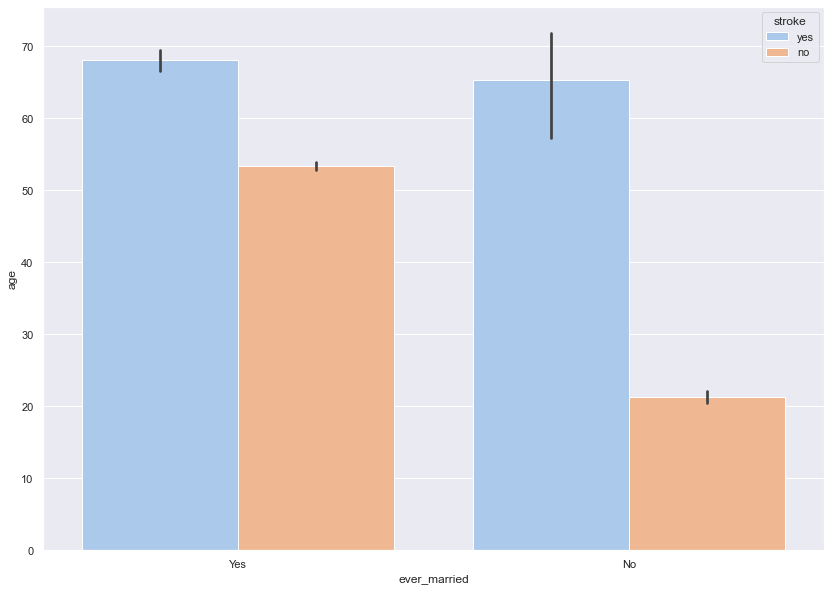

In [121]:
sns.barplot(y='age',
               x='ever_married' ,
               data=data,
               hue='stroke',
               palette="pastel")


<AxesSubplot:xlabel='work_type', ylabel='age'>

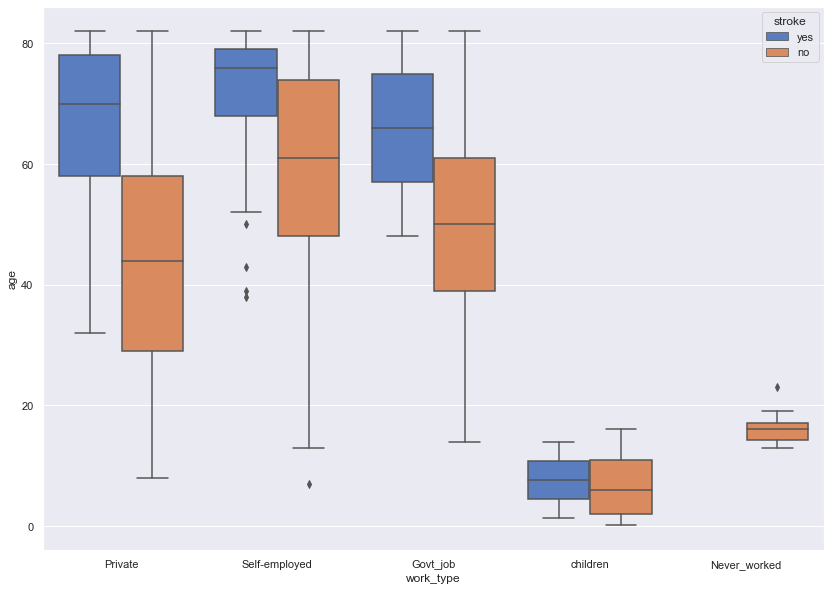

In [132]:
sns.boxplot(x="work_type", y="age", hue="stroke", palette="muted", data=data)

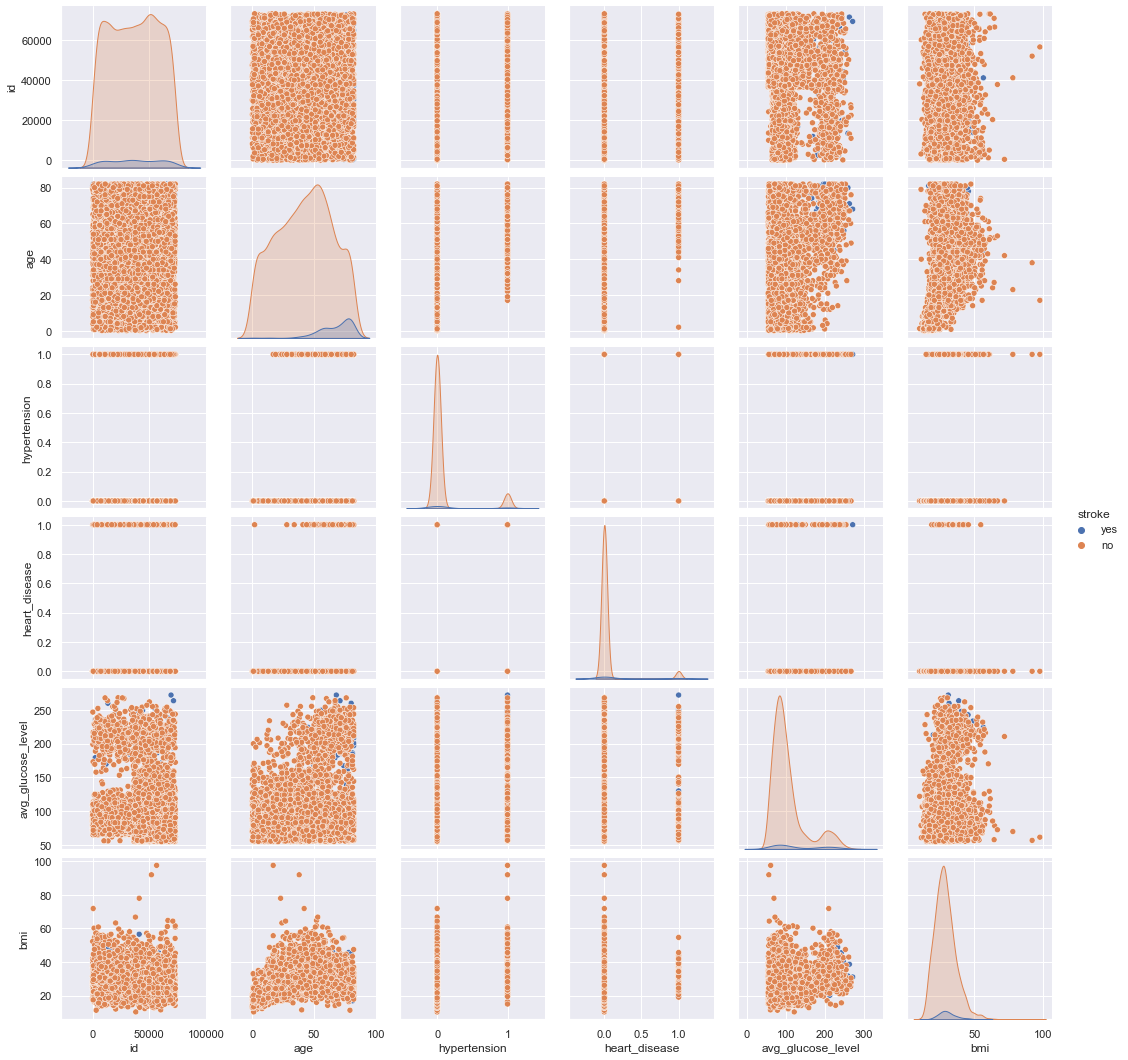

In [119]:
sns.pairplot(data, hue='stroke')

Data cleaning & feature engineering

In [40]:
cleanup_dict = {"gender":{"Male":1,"Female":2,"Other":3},
               "ever_married":{"No":1,"Yes":2},
               "Residence_type":{"Urban":1,"Rural":2},
               "work_type":{'Private':5, 'Self-employed':4, 'Govt_job':3, 'children':2,'Never_worked':1},
               "smoking_status":{'Unknown':0, 'never smoked':1,'formerly smoked':2, 'smokes':3 }
               }
#data=data.replace({"stroke": {0:'no',1:'yes'} }) # map data

In [41]:
clean_data = data.replace(cleanup_dict)

In [42]:
clean_data.isnull().sum(axis = 0) #NaN values in every column 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [43]:
clean_data.shape[0] # Num of rows

5110

In [44]:
clean_data2 = clean_data.dropna()

In [45]:
clean_data2.shape[0] # Num of rows

4909

In [46]:
print("Number of rows deleted for missing value ",clean_data.shape[0] - clean_data2.shape[0])

Number of rows deleted for missing value  201


In [47]:
clean_data2 = clean_data2.drop(["id"], axis=1)

# Exploratory analysis: Report

# Prediction model construction: model creation

Performance parameters
- Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
- Precision: A measure of a classifiers exactness.
- Recall: A measure of a classifiers completeness
- F1 Score (or F-score): A weighted average of precision and recall.
- ROC Curves: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [57]:
all_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

features = [ 'age','hypertension','heart_disease', 
       'work_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

target = ['stroke']

In [58]:
from sklearn import preprocessing

In [59]:
X = pd.DataFrame(clean_data2, columns=features)
Y = pd.DataFrame(clean_data2, columns=target)
X.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,5,228.69,36.6,2
2,80.0,0,1,5,105.92,32.5,1
3,49.0,0,0,5,171.23,34.4,3
4,79.0,1,0,4,174.12,24.0,1
5,81.0,0,0,5,186.21,29.0,2


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)

In [71]:
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

(unique, counts)  = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 1866],
       [   1,   98]])

In [ ]:
Class Umbalanced

In [62]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9210794297352343


In [203]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(" TN:",tn,"| FP:", fp,"| FN: ", fn,"| TP:", tp)

precision = tp/(fp+tp)
print('\n')
print('precision',precision)

recall = tp/(fn+tp)
print('recall',recall)
print('\n')


 TN: 1791 | FP: 80 | FN:  83 | TP: 10


precision 0.1111111111111111
recall 0.10752688172043011




In [21]:
clean_data2.iloc[0]

gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           2.00
work_type              5.00
Residence_type         1.00
avg_glucose_level    228.69
bmi                   36.60
smoking_status         2.00
stroke                 1.00
Name: 0, dtype: float64

In [22]:
YES_stroke_record = X.iloc[0]
NO_stroke_record = X.iloc[-1]
print("example of 'no' stroke data: ",Y.iloc[-1],YES_stroke_record)
print("="*50)
print("example of 'yes' stroke data: ",Y.iloc[0],NO_stroke_record)

example of 'no' stroke data:  stroke    0
Name: 5109, dtype: int64 age                   67.00
hypertension           0.00
heart_disease          1.00
work_type              5.00
avg_glucose_level    228.69
bmi                   36.60
smoking_status         2.00
Name: 0, dtype: float64
example of 'yes' stroke data:  stroke    1
Name: 0, dtype: int64 age                  44.00
hypertension          0.00
heart_disease         0.00
work_type             3.00
avg_glucose_level    85.28
bmi                  26.20
smoking_status        0.00
Name: 5109, dtype: float64


In [23]:
test_input = {"gender":2,
              "age": 75 ,
              "hypertension": 1,
              "heart_disease" :1,
              "ever_married":1,
              "work_type":5,
              "Residence_type":1,
              "avg_glucose_level":315,
              "bmi":55,
              "smoking_status":2
             }

yes_ = pd.Series(YES_stroke_record).values.reshape(1,-1)
no_ = pd.Series(NO_stroke_record).values.reshape(1,-1)

y_predicted = model.predict(no_)
if y_predicted[0]==0:
    print("no: stroke risk ",round(accuracy*100,2),"%")
else:
    print("yes: stroke risk",round(accuracy*100,2),"%")

no: stroke risk  92.21 %


### Model visualization 

In [24]:
# installation
! pip install graphviz
! pip install pydotplus

     |████████████████████████████████| 278 kB 414 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=776a5fe658c7eaa48e8f3b31db0f9fc41eaa0af93b80bb7df6919f40448443f5
  Stored in directory: /home/moebius/.cache/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [30]:
my_file = StringIO()
export_graphviz(model, out_file=my_file,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(my_file.getvalue())
path
import sys
path = sys.path[0]
Image(graph.create_png())
graph.write_png(path+'/stroke.png')

InvocationException: GraphViz's executables not found